# Competition

##자동차 모델 분류

In [1]:
import warnings
warnings.filterwarnings('ignore')

# I. DataSet Load

In [5]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/DataSet.pkl'

-rw------- 1 root root 82003032 Mar 24 00:14 '/content/drive/My Drive/Colab Notebooks/datasets/DataSet.pkl'


> ## 1) 'DataSet.pkl'

* 압축형식 : 'Gzip'

In [7]:
import pandas as pd

url = '/content/drive/My Drive/Colab Notebooks/datasets/DataSet.pkl'
DF = pd.read_pickle(url, compression = 'gzip')

DF.shape

(24916, 2701)

> ## 2) DataFrame Information

In [5]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24916 entries, 0 to 24915
Columns: 2701 entries, 0 to 2700
dtypes: object(2701)
memory usage: 513.4+ MB


In [6]:
DF.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2661,2662,2663,2664,2665,2666,2667,2668,2669,2670,2671,2672,2673,2674,2675,2676,2677,2678,2679,2680,2681,2682,2683,2684,2685,2686,2687,2688,2689,2690,2691,2692,2693,2694,2695,2696,2697,2698,2699,2700
0,230,236,252,226,232,248,220,227,245,214,223,240,212,220,241,206,219,238,204,216,240,199,215,238,199,215,241,193,213,238,189,208,238,183,207,235,181,204,236,177,...,28,28,28,23,24,26,18,22,23,18,21,26,17,22,26,14,21,27,13,20,26,11,16,20,15,20,23,20,21,25,22,24,23,37,35,36,55,54,52,G80스포츠
1,235,238,243,251,254,255,251,255,255,242,249,255,239,246,255,248,255,255,247,255,255,238,248,255,246,255,255,249,255,255,251,255,255,249,250,255,248,248,250,251,...,54,59,62,46,53,59,40,47,55,36,45,54,36,44,55,38,46,59,40,48,59,33,39,51,38,45,53,42,45,50,51,52,54,69,70,65,124,123,118,G80스포츠
2,94,112,134,85,103,125,76,97,118,80,101,122,95,116,137,109,130,151,114,137,155,114,137,155,112,133,150,121,143,157,86,105,120,66,86,97,127,145,157,189,...,41,53,65,41,54,63,51,64,73,64,77,86,66,79,88,55,68,76,42,55,63,51,64,70,50,63,69,48,62,65,52,66,69,67,78,82,80,91,95,G80스포츠
3,80,88,90,68,76,78,79,83,84,122,126,125,178,178,178,211,211,209,221,217,214,216,213,208,223,218,214,213,208,202,204,201,194,205,202,195,208,208,200,209,...,53,64,84,54,65,85,52,64,80,55,67,81,66,79,88,77,90,99,84,97,105,64,77,83,63,76,82,63,76,84,84,97,105,82,92,102,104,114,124,G80스포츠
4,215,229,194,212,222,195,210,217,201,217,218,213,226,223,232,229,221,236,222,211,227,213,201,211,213,203,204,216,209,199,221,215,201,218,217,197,210,211,195,205,...,31,47,60,42,58,71,51,67,80,58,72,83,61,75,86,62,76,85,63,77,86,87,101,110,94,108,117,84,99,106,94,109,116,99,114,119,81,96,101,G80스포츠


> ## 3) 'X', 'y' 분리

In [7]:
X = DF.iloc[:,:-1]
y = DF.iloc[:,-1]

X.shape, y.shape

((24916, 2700), (24916,))

> ## 4) Visualization

* '0'번 인덱스 label 및 이미지

G80스포츠


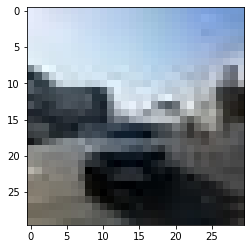

In [8]:
import numpy as np
import matplotlib.pyplot as plt

print(y.iloc[0])

plt.imshow(X.iloc[0].values.astype(np.int).reshape(30,30,3))
plt.show()

* '200'번 인덱스 label 및 이미지

G80스포츠


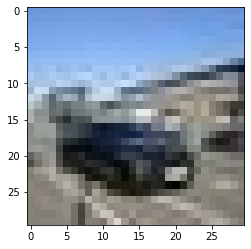

In [9]:
print(y.iloc[200])

plt.imshow(X.iloc[200].values.astype(np.int).reshape(30,30,3))
plt.show()

* '400'번 인덱스 label 및 이미지

G80스포츠


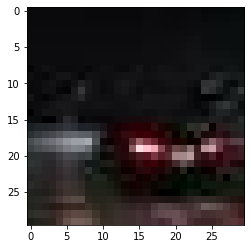

In [10]:
print(y.iloc[400])

plt.imshow(X.iloc[400].values.astype(np.int).reshape(30,30,3))
plt.show()

# II. Data Preprocessing

In [11]:
print(y.value_counts())
print(len(y.value_counts()))

투싼            1931
i30           1296
싼타페           1282
그랜저HG240       940
KONA 1         840
그랜저            770
소나타 YF         762
소나타 뉴라이즈       725
G90            714
소나타 하이브리드      664
아슬란            659
소나타 LF         653
더뉴아반떼AD        653
제네시스G380       652
소나타 LPI        646
엑센트            641
아반떼 XD         639
제네시스 G80       638
아반떼MD          636
소나타            635
아이오닉 하이브리드     633
팰리세이드          628
투싼1            628
그랜저 IG         627
아반떼AD          627
벨로스터           620
아이오닉 일렉트릭      620
에쿠스            619
스타렉스           614
맥스크루즈          605
G80스포츠         605
소나타 NF         605
제네시스 G70       600
더뉴그랜드스타렉스      509
Name: 2700, dtype: int64
34


In [12]:
X = X.values
y = y.values
print(X[:5], y[:5])

[[230 236 252 ... 55 54 52]
 [235 238 243 ... 124 123 118]
 [94 112 134 ... 80 91 95]
 [80 88 90 ... 104 114 124]
 [215 229 194 ... 81 96 101]] ['G80스포츠' 'G80스포츠' 'G80스포츠' 'G80스포츠' 'G80스포츠']


In [13]:
X_array= X.astype(float)/255

In [14]:
X_array[:1]

array([[0.90196078, 0.9254902 , 0.98823529, ..., 0.21568627, 0.21176471,
        0.20392157]])

In [15]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_LE = encoder.fit_transform(y)
y_LE

array([ 0,  0,  0, ..., 33, 33, 33])

In [16]:
from keras.utils import to_categorical

y_LE = to_categorical(y_LE)
print(y_LE[:5])

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_array, y_LE, test_size=0.2, random_state=2045)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(19932, 2700) (4984, 2700) (19932, 34) (4984, 34)


In [18]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=2045)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(15945, 2700) (3987, 2700) (15945, 34) (3987, 34)


In [19]:
print(X_train.shape, y_train.shape)
print( X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(15945, 2700) (15945, 34)
(3987, 2700) (3987, 34)
(4984, 2700) (4984, 34)


# III. Modeling

## 1) RNN

In [ ]:
from keras import models, layers, regularizers

RNN = models.Sequential()
RNN.add(layers.Dense(512, input_shape=(2700,), kernel_regularizer=regularizers.l2(0.00001)))
RNN.add(layers.BatchNormalization())
RNN.add(layers.Activation('relu'))
RNN.add(layers.Dropout(0.4))
RNN.add(layers.Dense(256, kernel_regularizer=regularizers.l2(0.00001)))
RNN.add(layers.Activation('relu'))
RNN.add(layers.Dropout(0.4))
RNN.add(layers.Dropout(0.4))
RNN.add(layers.Dense(34, activation='softmax'))

RNN.summary()

RNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Hist_RNN = RNN.fit(X_train, y_train, epochs=150, batch_size=128, validation_data=(X_valid, y_valid))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 512)               1382912   
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 256)               131328    
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)              

In [ ]:
loss, accuracy = RNN.evaluate(X_test, y_test)

loss_RNN, accuracy_RNN

156/156 [==============================] - 0s 2ms/step - loss: 2.9984 - accuracy: 0.3551


(2.9983692169189453, 0.3551364243030548)

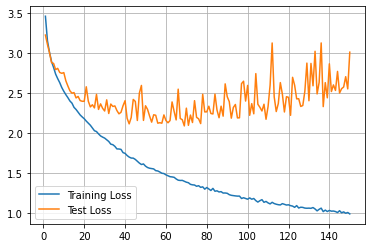

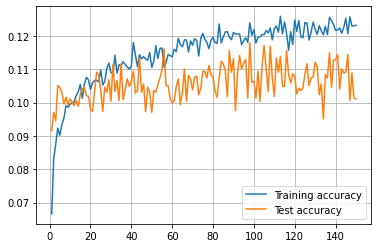

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_RNN3.history['loss'])+1)


plt.plot(epochs, Hist_RNN3.history['loss'])
plt.plot(epochs, Hist_RNN3.history['val_loss'])
plt.legend(['Training Loss','Test Loss'])
plt.grid()
plt.show()



plt.plot(epochs, Hist_RNN2.history['accuracy'])
plt.plot(epochs, Hist_RNN2.history['val_accuracy'])
plt.legend(['Training accuracy','Test accuracy'])
plt.grid()
plt.show()

## 2) CNN

In [118]:
X_train = X_train.reshape((15945, 30,30,3))
X_valid =X_valid.reshape((3987, 30,30,3))
X_test= X_test.reshape((4984, 30,30,3))
X_train.shape, X_valid.shape, X_test.shape

((15945, 30, 30, 3), (3987, 30, 30, 3), (4984, 30, 30, 3))

In [119]:
from keras.preprocessing.image import ImageDataGenerator

X_train_datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
                                   shear_range=0.2, zoom_range=0.2, horizontal_flip=True, vertical_flip=True, 
                                   fill_mode='nearest')

X_valid_datagen = ImageDataGenerator()

train_generator = X_train_datagen.flow(X_train, y_train, batch_size=128)
valid_generator = X_valid_datagen.flow(X_valid, y_valid, batch_size=128)

### 1) basic

In [120]:
from keras import layers, models

CNN = models.Sequential()
CNN.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(30, 30, 3)))
CNN.add(layers.MaxPool2D((2,2)))

CNN.add(layers.Conv2D(64, (3,3), activation='relu'))
CNN.add(layers.Conv2D(128, (3,3), activation='relu'))
CNN.add(layers.MaxPool2D((2,2)))

CNN.add(layers.Conv2D(128, (3,3), activation='relu'))

CNN.add(layers.Flatten())
CNN.add(layers.Dense(units=512, activation='relu'))
CNN.add(layers.Dropout(0.5))
CNN.add(layers.Dense(units=34, activation='softmax'))

CNN.summary()

CNN.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_150 (Conv2D)          (None, 28, 28, 32)        896       
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_151 (Conv2D)          (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_152 (Conv2D)          (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_153 (Conv2D)          (None, 3, 3, 128)         147584    
_________________________________________________________________
flatten_32 (Flatten)         (None, 1152)            

In [121]:
%%time
Hist_CNN = CNN.fit(train_generator, steps_per_epoch=len(X_train)/128 ,
                       epochs = 100,
                       validation_data=valid_generator, validation_steps=len(X_valid)/128)

Epoch 1/100
124/124 [==============================] - 8s 62ms/step - loss: 3.4721 - accuracy: 0.0719 - val_loss: 3.4005 - val_accuracy: 0.0805
Epoch 2/100
124/124 [==============================] - 7s 60ms/step - loss: 3.1753 - accuracy: 0.0938 - val_loss: 3.1422 - val_accuracy: 0.1043
Epoch 3/100
124/124 [==============================] - 7s 60ms/step - loss: 3.0283 - accuracy: 0.1019 - val_loss: 2.9472 - val_accuracy: 0.1058
Epoch 4/100
124/124 [==============================] - 8s 60ms/step - loss: 2.9192 - accuracy: 0.1155 - val_loss: 3.0673 - val_accuracy: 0.1063
Epoch 5/100
124/124 [==============================] - 7s 60ms/step - loss: 2.8344 - accuracy: 0.1302 - val_loss: 2.9087 - val_accuracy: 0.1131
Epoch 6/100
124/124 [==============================] - 8s 60ms/step - loss: 2.7859 - accuracy: 0.1397 - val_loss: 2.9874 - val_accuracy: 0.1244
Epoch 7/100
124/124 [==============================] - 7s 60ms/step - loss: 2.7044 - accuracy: 0.1626 - val_loss: 2.5363 - val_accuracy:

In [122]:
loss1, accuracy1 = CNN.evaluate(X_test, y_test)

loss1, accuracy1 

156/156 [==============================] - 1s 3ms/step - loss: 1.9616 - accuracy: 0.4260


(1.9615941047668457, 0.42596307396888733)

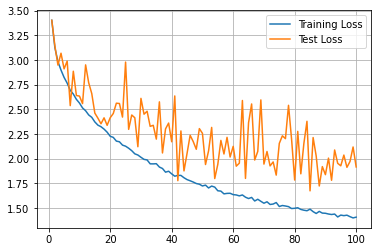

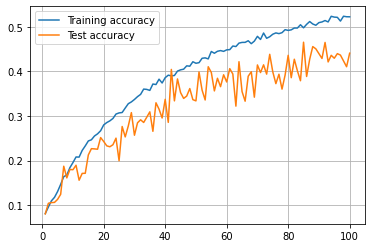

In [123]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_CNN.history['loss'])+1)


plt.plot(epochs, Hist_CNN.history['loss'])
plt.plot(epochs, Hist_CNN.history['val_loss'])
plt.legend(['Training Loss','Test Loss'])
plt.grid()
plt.show()



plt.plot(epochs, Hist_CNN.history['accuracy'])
plt.plot(epochs, Hist_CNN.history['val_accuracy'])
plt.legend(['Training accuracy','Test accuracy'])
plt.grid()
plt.show()

### 3) L2 + Dropout

In [124]:
from keras import layers, models

CNN3 = models.Sequential()
CNN3.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(30, 30, 3),
                      kernel_regularizer=regularizers.l2(0.00001)))
CNN3.add(layers.Dropout(0.4))
CNN3.add(layers.MaxPool2D((2,2)))

CNN3.add(layers.Conv2D(64, (3,3), activation='relu'))
CNN3.add(layers.Conv2D(128, (3,3), activation='relu'))
CNN3.add(layers.MaxPool2D((2,2)))

CNN3.add(layers.Conv2D(128, (3,3), activation='relu'))

CNN3.add(layers.Flatten())
CNN3.add(layers.Dense(units=512, activation='relu'))
CNN3.add(layers.Dropout(0.5))
CNN3.add(layers.Dense(units=34, activation='softmax'))

CNN3.summary()

CNN3.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_154 (Conv2D)          (None, 28, 28, 32)        896       
_________________________________________________________________
dropout_88 (Dropout)         (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_155 (Conv2D)          (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_156 (Conv2D)          (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_157 (Conv2D)          (None, 3, 3, 128)       

In [125]:
%%time
Hist_CNN3 = CNN3.fit(train_generator, steps_per_epoch=len(X_train)/128 ,
                       epochs = 100,
                       validation_data=valid_generator, validation_steps=len(X_valid)/128)

Epoch 1/100
124/124 [==============================] - 8s 63ms/step - loss: 3.4769 - accuracy: 0.0736 - val_loss: 3.3354 - val_accuracy: 0.0863
Epoch 2/100
124/124 [==============================] - 8s 60ms/step - loss: 3.2083 - accuracy: 0.0858 - val_loss: 3.1630 - val_accuracy: 0.1076
Epoch 3/100
124/124 [==============================] - 8s 61ms/step - loss: 3.0184 - accuracy: 0.1043 - val_loss: 2.8513 - val_accuracy: 0.1257
Epoch 4/100
124/124 [==============================] - 8s 61ms/step - loss: 2.9093 - accuracy: 0.1197 - val_loss: 2.8351 - val_accuracy: 0.1367
Epoch 5/100
124/124 [==============================] - 8s 60ms/step - loss: 2.8179 - accuracy: 0.1363 - val_loss: 2.8386 - val_accuracy: 0.1405
Epoch 6/100
124/124 [==============================] - 7s 60ms/step - loss: 2.7494 - accuracy: 0.1552 - val_loss: 2.7584 - val_accuracy: 0.1457
Epoch 7/100
124/124 [==============================] - 8s 61ms/step - loss: 2.6916 - accuracy: 0.1740 - val_loss: 2.6221 - val_accuracy:

In [129]:
loss3, accuracy3 = CNN3.evaluate(X_test, y_test)

loss3, accuracy3

156/156 [==============================] - 1s 3ms/step - loss: 1.8908 - accuracy: 0.4248


(1.8908076286315918, 0.42475923895835876)

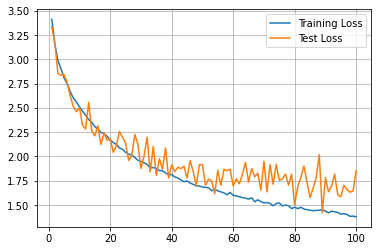

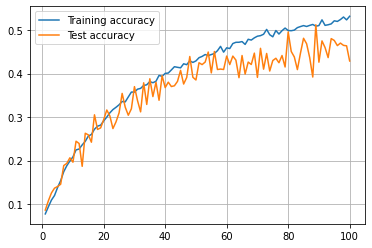

In [127]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_CNN3.history['loss'])+1)


plt.plot(epochs, Hist_CNN3.history['loss'])
plt.plot(epochs, Hist_CNN3.history['val_loss'])
plt.legend(['Training Loss','Test Loss'])
plt.grid()
plt.show()



plt.plot(epochs, Hist_CNN3.history['accuracy'])
plt.plot(epochs, Hist_CNN3.history['val_accuracy'])
plt.legend(['Training accuracy','Test accuracy'])
plt.grid()
plt.show()

### 4) Rmsprop

In [81]:
from keras import layers, models

CNN4 = models.Sequential()
CNN4.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(30, 30, 3)))
CNN4.add(layers.Dropout(0.5))
CNN4.add(layers.MaxPool2D((2,2)))

CNN4.add(layers.Conv2D(64, (3,3), activation='relu'))
CNN4.add(layers.Dropout(0.5))
CNN4.add(layers.MaxPool2D((2,2)))

CNN4.add(layers.Conv2D(128, (3,3), activation='relu'))
CNN4.add(layers.Conv2D(128, (3,3), activation='relu'))

CNN4.add(layers.Flatten())
CNN4.add(layers.Dense(units=512, activation='relu'))
CNN4.add(layers.Dropout(0.5))
CNN4.add(layers.Dense(units=34, activation='softmax'))

CNN4.summary()

CNN4.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_80 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
dropout_38 (Dropout)         (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
dropout_39 (Dropout)         (None, 13, 13, 64)        0         
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 4, 4, 128)       

In [82]:
%%time
Hist_CNN4 = CNN4.fit(train_generator, steps_per_epoch=len(X_train)/128 ,
                       epochs = 100,
                       validation_data=valid_generator, validation_steps=len(X_valid)/128)

Epoch 1/100
124/124 [==============================] - 8s 61ms/step - loss: 3.4885 - accuracy: 0.0722 - val_loss: 3.3017 - val_accuracy: 0.1021
Epoch 2/100
124/124 [==============================] - 7s 59ms/step - loss: 3.2510 - accuracy: 0.0852 - val_loss: 3.1127 - val_accuracy: 0.1041
Epoch 3/100
124/124 [==============================] - 7s 59ms/step - loss: 3.1233 - accuracy: 0.1015 - val_loss: 3.0260 - val_accuracy: 0.1089
Epoch 4/100
124/124 [==============================] - 7s 59ms/step - loss: 3.0168 - accuracy: 0.1094 - val_loss: 3.0819 - val_accuracy: 0.1021
Epoch 5/100
124/124 [==============================] - 7s 59ms/step - loss: 2.9494 - accuracy: 0.1220 - val_loss: 2.8632 - val_accuracy: 0.1262
Epoch 6/100
124/124 [==============================] - 7s 60ms/step - loss: 2.8738 - accuracy: 0.1361 - val_loss: 2.8534 - val_accuracy: 0.1226
Epoch 7/100
124/124 [==============================] - 7s 59ms/step - loss: 2.8248 - accuracy: 0.1411 - val_loss: 2.7436 - val_accuracy:

In [83]:
loss4, accuracy4 = CNN4.evaluate(X_test, y_test)

loss4, accuracy4

156/156 [==============================] - 1s 3ms/step - loss: 2.4324 - accuracy: 0.2893


(2.432363748550415, 0.2893258333206177)

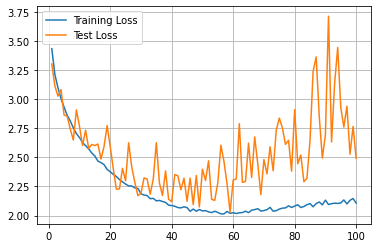

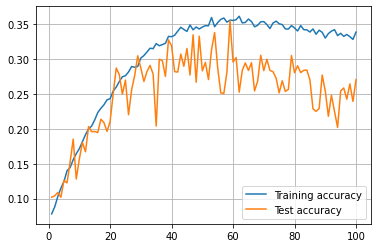

In [84]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_CNN4.history['loss'])+1)


plt.plot(epochs, Hist_CNN4.history['loss'])
plt.plot(epochs, Hist_CNN4.history['val_loss'])
plt.legend(['Training Loss','Test Loss'])
plt.grid()
plt.show()



plt.plot(epochs, Hist_CNN4.history['accuracy'])
plt.plot(epochs, Hist_CNN4.history['val_accuracy'])
plt.legend(['Training accuracy','Test accuracy'])
plt.grid()
plt.show()

### 5) layer 늘림

In [91]:
from keras import layers, models

CNN5 = models.Sequential()
CNN5.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(30, 30, 3)))
CNN5.add(layers.MaxPool2D((2,2)))
CNN5.add(layers.Dropout(0.4))

CNN5.add(layers.Conv2D(64, (3,3), activation='relu'))
CNN5.add(layers.Dropout(0.4))

CNN5.add(layers.Conv2D(64, (3,3), activation='relu'))
CNN5.add(layers.MaxPool2D((2,2)))
CNN5.add(layers.Dropout(0.4))

CNN5.add(layers.Conv2D(128, (3,3), activation='relu'))
CNN5.add(layers.Dropout(0.4))

CNN5.add(layers.Conv2D(128, (3,3), activation='relu'))

CNN5.add(layers.Flatten())
CNN5.add(layers.Dense(units=512, activation='relu'))
CNN5.add(layers.Dropout(0.5))
CNN5.add(layers.Dense(units=34, activation='softmax'))

CNN5.summary()

CNN5.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_89 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
dropout_46 (Dropout)         (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
dropout_47 (Dropout)         (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
dropout_48 (Dropout)         (None, 11, 11, 64)      

In [93]:
%%time
Hist_CNN5 = CNN5.fit(train_generator, steps_per_epoch=len(X_train)/128 ,
                       epochs = 100,
                       validation_data=valid_generator, validation_steps=len(X_valid)/128)

Epoch 1/100
124/124 [==============================] - 8s 64ms/step - loss: 3.4725 - accuracy: 0.0776 - val_loss: 3.3786 - val_accuracy: 0.0740
Epoch 2/100
124/124 [==============================] - 8s 61ms/step - loss: 3.2265 - accuracy: 0.0864 - val_loss: 3.1676 - val_accuracy: 0.1011
Epoch 3/100
124/124 [==============================] - 8s 62ms/step - loss: 3.0530 - accuracy: 0.0995 - val_loss: 2.9799 - val_accuracy: 0.1099
Epoch 4/100
124/124 [==============================] - 8s 62ms/step - loss: 2.9588 - accuracy: 0.1097 - val_loss: 2.9737 - val_accuracy: 0.1021
Epoch 5/100
124/124 [==============================] - 8s 62ms/step - loss: 2.9088 - accuracy: 0.1160 - val_loss: 2.8228 - val_accuracy: 0.1317
Epoch 6/100
124/124 [==============================] - 8s 61ms/step - loss: 2.8563 - accuracy: 0.1256 - val_loss: 2.8038 - val_accuracy: 0.1277
Epoch 7/100
124/124 [==============================] - 8s 63ms/step - loss: 2.8272 - accuracy: 0.1308 - val_loss: 2.7856 - val_accuracy:

In [95]:
loss5, accuracy5 = CNN5.evaluate(X_test, y_test)

loss5, accuracy5

156/156 [==============================] - 1s 4ms/step - loss: 2.0407 - accuracy: 0.3333


(2.0407402515411377, 0.3332664668560028)

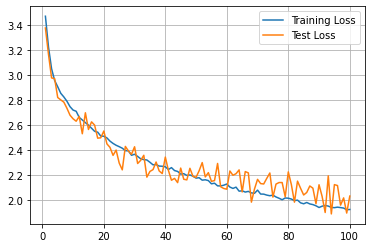

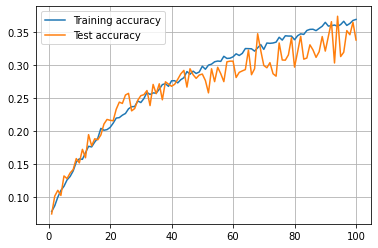

In [96]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_CNN5.history['loss'])+1)


plt.plot(epochs, Hist_CNN5.history['loss'])
plt.plot(epochs, Hist_CNN5.history['val_loss'])
plt.legend(['Training Loss','Test Loss'])
plt.grid()
plt.show()



plt.plot(epochs, Hist_CNN5.history['accuracy'])
plt.plot(epochs, Hist_CNN5.history['val_accuracy'])
plt.legend(['Training accuracy','Test accuracy'])
plt.grid()
plt.show()

### 6) 에포크 늘림 / 말도 안되게 낮은 값 나옴
* 발산한건가?? 왜??

In [137]:
from keras import layers, models

CNN6 = models.Sequential()
CNN6.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(30, 30, 3),
                      kernel_regularizer=regularizers.l2(0.00001)))
CNN6.add(layers.Dropout(0.4))
CNN6.add(layers.Conv2D(64, (3,3), activation='relu'))
CNN6.add(layers.Conv2D(64, (3,3), activation='relu'))
CNN6.add(layers.Dropout(0.4))
CNN6.add(layers.Conv2D(128, (3,3), activation='relu'))
CNN6.add(layers.Dropout(0.4))
CNN6.add(layers.Conv2D(128, (3,3), activation='relu'))
CNN6.add(layers.MaxPool2D((2,2)))
CNN6.add(layers.Conv2D(256, (3,3), activation='relu'))
CNN6.add(layers.Conv2D(256, (3,3), activation='relu'))


CNN6.add(layers.Flatten())
CNN6.add(layers.Dense(units=512, activation='relu'))
CNN6.add(layers.Dropout(0.5))
CNN6.add(layers.Dense(units=34, activation='softmax'))

CNN6.summary()

CNN6.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_158 (Conv2D)          (None, 28, 28, 32)        896       
_________________________________________________________________
dropout_90 (Dropout)         (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_159 (Conv2D)          (None, 26, 26, 64)        18496     
_________________________________________________________________
conv2d_160 (Conv2D)          (None, 24, 24, 64)        36928     
_________________________________________________________________
dropout_91 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_161 (Conv2D)          (None, 22, 22, 128)       73856     
_________________________________________________________________
dropout_92 (Dropout)         (None, 22, 22, 128)     

In [138]:
%%time
Hist_CNN6 = CNN6.fit(train_generator, steps_per_epoch=len(X_train)/128 ,
                       epochs = 300,
                       validation_data=valid_generator, validation_steps=len(X_valid)/128)

Epoch 1/300
124/124 [==============================] - 10s 75ms/step - loss: 3.5013 - accuracy: 0.0658 - val_loss: 3.4824 - val_accuracy: 0.0740
Epoch 2/300
124/124 [==============================] - 9s 73ms/step - loss: 3.4779 - accuracy: 0.0825 - val_loss: 3.4790 - val_accuracy: 0.0740
Epoch 3/300
 10/124 [=>............................] - ETA: 7s - loss: 3.4932 - accuracy: 0.0794

KeyboardInterrupt: ignored

In [ ]:
loss6, accuracy6 = CNN6.evaluate(X_test, y_test)

loss6, accuracy6

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_CNN6.history['loss'])+1)


plt.plot(epochs, Hist_CNN6.history['loss'])
plt.plot(epochs, Hist_CNN6.history['val_loss'])
plt.legend(['Training Loss','Test Loss'])
plt.grid()
plt.show()



plt.plot(epochs, Hist_CNN3.history['accuracy'])
plt.plot(epochs, Hist_CNN3.history['val_accuracy'])
plt.legend(['Training accuracy','Test accuracy'])
plt.grid()
plt.show()

#### 6-1 dropout/ L2 제거(규제 제거, 레이어 최대로)

In [140]:
from keras import layers, models

CNN6_1 = models.Sequential()
CNN6_1.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(30, 30, 3)))

CNN6_1.add(layers.Conv2D(64, (3,3), activation='relu'))
CNN6_1.add(layers.Conv2D(64, (3,3), activation='relu'))
CNN6_1.add(layers.MaxPool2D((2,2)))

CNN6_1.add(layers.Conv2D(128, (3,3), activation='relu'))
CNN6_1.add(layers.Conv2D(128, (3,3), activation='relu'))

CNN6_1.add(layers.Conv2D(256, (3,3), activation='relu'))
CNN6_1.add(layers.Conv2D(256, (3,3), activation='relu'))
#CNN6_1.add(layers.MaxPool2D((2,2)))

CNN6_1.add(layers.Flatten())
CNN6_1.add(layers.Dense(units=512, activation='relu'))
CNN6_1.add(layers.Dropout(0.5))
CNN6_1.add(layers.Dense(units=34, activation='softmax'))

CNN6_1.summary()

CNN6_1.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_167 (Conv2D)          (None, 28, 28, 32)        896       
_________________________________________________________________
conv2d_168 (Conv2D)          (None, 26, 26, 64)        18496     
_________________________________________________________________
conv2d_169 (Conv2D)          (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_170 (Conv2D)          (None, 10, 10, 128)       73856     
_________________________________________________________________
conv2d_171 (Conv2D)          (None, 8, 8, 128)         147584    
_________________________________________________________________
conv2d_172 (Conv2D)          (None, 6, 6, 256)       

In [141]:
%%time
Hist_CNN6_1 = CNN6_1.fit(train_generator, steps_per_epoch=len(X_train)/128 ,
                       epochs = 300,
                       validation_data=valid_generator, validation_steps=len(X_valid)/128)

Epoch 1/300
124/124 [==============================] - 10s 70ms/step - loss: 3.4978 - accuracy: 0.0729 - val_loss: 3.4830 - val_accuracy: 0.0740
Epoch 2/300
124/124 [==============================] - 8s 67ms/step - loss: 3.4797 - accuracy: 0.0790 - val_loss: 3.4401 - val_accuracy: 0.0825
Epoch 3/300
124/124 [==============================] - 8s 67ms/step - loss: 3.3835 - accuracy: 0.0814 - val_loss: 3.0888 - val_accuracy: 0.0795
Epoch 4/300
124/124 [==============================] - 8s 67ms/step - loss: 3.1690 - accuracy: 0.0906 - val_loss: 3.2624 - val_accuracy: 0.0976
Epoch 5/300
124/124 [==============================] - 8s 67ms/step - loss: 3.0349 - accuracy: 0.1094 - val_loss: 3.0552 - val_accuracy: 0.1056
Epoch 6/300
124/124 [==============================] - 8s 67ms/step - loss: 2.9373 - accuracy: 0.1152 - val_loss: 3.1519 - val_accuracy: 0.0878
Epoch 7/300
124/124 [==============================] - 8s 67ms/step - loss: 2.8883 - accuracy: 0.1142 - val_loss: 2.9062 - val_accuracy

In [142]:
loss6_1, accuracy6_1 = CNN6_1.evaluate(X_test, y_test)

loss6_1, accuracy6_1 

156/156 [==============================] - 1s 5ms/step - loss: 2.0997 - accuracy: 0.4703


(2.099672794342041, 0.4703049659729004)

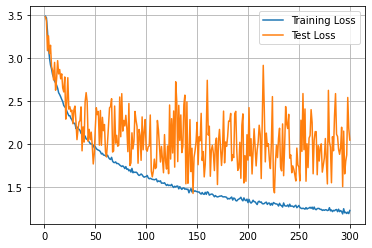

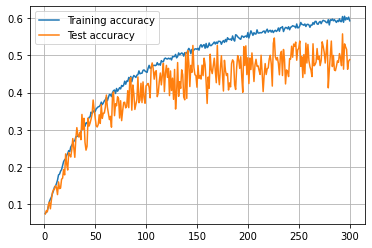

In [143]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_CNN6_1.history['loss'])+1)


plt.plot(epochs, Hist_CNN6_1.history['loss'])
plt.plot(epochs, Hist_CNN6_1.history['val_loss'])
plt.legend(['Training Loss','Test Loss'])
plt.grid()
plt.show()



plt.plot(epochs, Hist_CNN6_1.history['accuracy'])
plt.plot(epochs, Hist_CNN6_1.history['val_accuracy'])
plt.legend(['Training accuracy','Test accuracy'])
plt.grid()
plt.show()

### 7) padding = same

In [116]:
from keras import layers, models

CNN7 = models.Sequential()
CNN7.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(30, 30, 3), padding='same'))
CNN7.add(layers.MaxPool2D((2,2)))
CNN7.add(layers.Dropout(0.4))
CNN7.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
CNN7.add(layers.MaxPool2D((2,2)))
CNN7.add(layers.Dropout(0.4))
CNN7.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
CNN7.add(layers.MaxPool2D((2,2)))
CNN7.add(layers.Dropout(0.4))
CNN7.add(layers.Conv2D(128, (3,3), activation='relu', padding='same'))



CNN7.add(layers.Flatten())
CNN7.add(layers.Dense(units=512, activation='relu'))
CNN7.add(layers.Dropout(0.5))
CNN7.add(layers.Dense(units=34, activation='softmax'))

CNN7.summary()

CNN7.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_146 (Conv2D)          (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_83 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_147 (Conv2D)          (None, 15, 15, 64)        18496     
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_84 (Dropout)         (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_148 (Conv2D)          (None, 7, 7, 64)        

In [133]:
%%time
Hist_CNN7 = CNN7.fit(train_generator, steps_per_epoch=len(X_train)/128 ,
                       epochs = 150,
                       validation_data=valid_generator, validation_steps=len(X_valid)/128)

Epoch 1/150
124/124 [==============================] - 8s 64ms/step - loss: 3.4119 - accuracy: 0.0784 - val_loss: 3.2354 - val_accuracy: 0.1003
Epoch 2/150
124/124 [==============================] - 8s 61ms/step - loss: 3.2062 - accuracy: 0.0874 - val_loss: 3.0981 - val_accuracy: 0.1086
Epoch 3/150
124/124 [==============================] - 8s 61ms/step - loss: 3.1000 - accuracy: 0.1000 - val_loss: 3.1203 - val_accuracy: 0.0926
Epoch 4/150
124/124 [==============================] - 8s 62ms/step - loss: 3.0156 - accuracy: 0.1076 - val_loss: 3.0152 - val_accuracy: 0.0943
Epoch 5/150
124/124 [==============================] - 8s 63ms/step - loss: 2.9665 - accuracy: 0.1145 - val_loss: 2.9204 - val_accuracy: 0.1184
Epoch 6/150
124/124 [==============================] - 8s 62ms/step - loss: 2.9049 - accuracy: 0.1225 - val_loss: 2.9301 - val_accuracy: 0.1146
Epoch 7/150
124/124 [==============================] - 8s 61ms/step - loss: 2.8787 - accuracy: 0.1262 - val_loss: 2.7649 - val_accuracy:

In [134]:
loss7, accuracy7 = CNN7.evaluate(X_test, y_test)

loss7, accuracy7

156/156 [==============================] - 1s 4ms/step - loss: 1.8238 - accuracy: 0.3876


(1.8237773180007935, 0.38764044642448425)

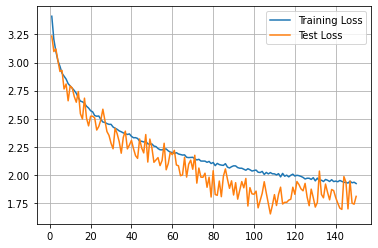

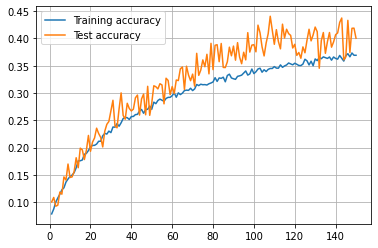

In [135]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_CNN7.history['loss'])+1)


plt.plot(epochs, Hist_CNN7.history['loss'])
plt.plot(epochs, Hist_CNN7.history['val_loss'])
plt.legend(['Training Loss','Test Loss'])
plt.grid()
plt.show()



plt.plot(epochs, Hist_CNN7.history['accuracy'])
plt.plot(epochs, Hist_CNN7.history['val_accuracy'])
plt.legend(['Training accuracy','Test accuracy'])
plt.grid()
plt.show()

### 8) batch_size 업 = 다른 건 40이었는데 이건 70.. 뭐지??

In [153]:
train_sample, test_sample, train_label, test_label = train_test_split(X, y_LE, test_size=0.2, random_state=2045)
train_sample, valid_sample, train_label, valid_label = train_test_split(train_sample, train_label, test_size=0.2, random_state=2045)
train_sample = train_sample.reshape((15945, 30,30,3))
valid_sample =valid_sample.reshape((3987, 30,30,3))
test_sample= test_sample.reshape((4984, 30,30,3))
train_sample.shape, valid_sample.shape, test_sample.shape, 

((15945, 30, 30, 3), (3987, 30, 30, 3), (4984, 30, 30, 3))

In [158]:
from keras.preprocessing.image import ImageDataGenerator

X_train_datagen = ImageDataGenerator(rescale = 1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
                                   shear_range=0.2, zoom_range=0.2, horizontal_flip=True, vertical_flip=True, 
                                   fill_mode='nearest')

X_valid_datagen = ImageDataGenerator(rescale = 1./255)
X_test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator_ed = X_train_datagen.flow(train_sample, train_label, batch_size=518)
valid_generator_ed = X_valid_datagen.flow(valid_sample, valid_label, batch_size=518)
test_generator_ed = X_valid_datagen.flow(valid_sample, valid_label, batch_size=518)

In [163]:
from keras import layers, models

CNN8 = models.Sequential()
CNN8.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(30, 30, 3), padding='same'))

CNN8.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
CNN8.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
CNN8.add(layers.MaxPool2D((2,2)))

CNN8.add(layers.Conv2D(128, (3,3), activation='relu', padding='same'))
CNN8.add(layers.Conv2D(128, (3,3), activation='relu', padding='same'))
CNN8.add(layers.MaxPool2D((2,2)))

CNN8.add(layers.Conv2D(256, (3,3), activation='relu', padding='same'))
CNN8.add(layers.Conv2D(256, (3,3), activation='relu', padding='same'))


CNN8.add(layers.Flatten())
CNN8.add(layers.Dense(units=512, activation='relu'))
CNN8.add(layers.Dropout(0.5))
CNN8.add(layers.Dense(units=34, activation='softmax'))

CNN8.summary()

CNN8.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])



Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_199 (Conv2D)          (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_200 (Conv2D)          (None, 30, 30, 64)        18496     
_________________________________________________________________
conv2d_201 (Conv2D)          (None, 30, 30, 64)        36928     
_________________________________________________________________
max_pooling2d_69 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_202 (Conv2D)          (None, 15, 15, 128)       73856     
_________________________________________________________________
conv2d_203 (Conv2D)          (None, 15, 15, 128)       147584    
_________________________________________________________________
max_pooling2d_70 (MaxPooling (None, 7, 7, 128)       

In [164]:
%%time
Hist_CNN8 = CNN8.fit(train_generator_ed, steps_per_epoch=len(train_sample)/518 ,
                       epochs = 200,
                       validation_data=valid_generator_ed, validation_steps=len(valid_sample)/518)

Epoch 1/200
30/30 [==============================] - 9s 272ms/step - loss: 3.5016 - accuracy: 0.0703 - val_loss: 3.4794 - val_accuracy: 0.0740
Epoch 2/200
30/30 [==============================] - 8s 263ms/step - loss: 3.4688 - accuracy: 0.0789 - val_loss: 3.2886 - val_accuracy: 0.0913
Epoch 3/200
30/30 [==============================] - 8s 264ms/step - loss: 3.2670 - accuracy: 0.0889 - val_loss: 3.0617 - val_accuracy: 0.1086
Epoch 4/200
30/30 [==============================] - 8s 260ms/step - loss: 3.1227 - accuracy: 0.0946 - val_loss: 2.9600 - val_accuracy: 0.1166
Epoch 5/200
30/30 [==============================] - 8s 260ms/step - loss: 2.9830 - accuracy: 0.1159 - val_loss: 2.8464 - val_accuracy: 0.1154
Epoch 6/200
30/30 [==============================] - 8s 261ms/step - loss: 2.9063 - accuracy: 0.1200 - val_loss: 3.0657 - val_accuracy: 0.1031
Epoch 7/200
30/30 [==============================] - 8s 267ms/step - loss: 2.8392 - accuracy: 0.1333 - val_loss: 3.0804 - val_accuracy: 0.1038

In [166]:
loss8, accuracy8 = CNN8.evaluate(test_generator_ed, batch_size=20)
loss8, accuracy8

8/8 [==============================] - 0s 36ms/step - loss: 1.1710 - accuracy: 0.7168


(1.1710302829742432, 0.7168297171592712)

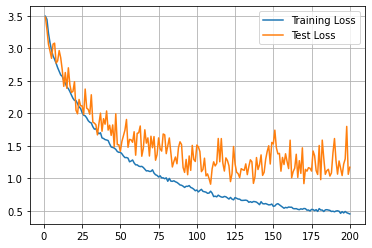

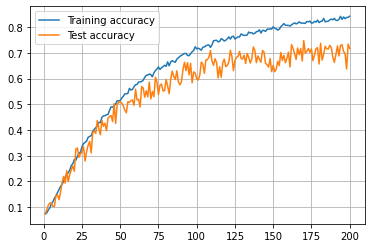

In [170]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_CNN8.history['loss'])+1)


plt.plot(epochs, Hist_CNN8.history['loss'])
plt.plot(epochs, Hist_CNN8.history['val_loss'])
plt.legend(['Training Loss','Test Loss'])
plt.grid()
plt.show()



plt.plot(epochs, Hist_CNN8.history['accuracy'])
plt.plot(epochs, Hist_CNN8.history['val_accuracy'])
plt.legend(['Training accuracy','Test accuracy'])
plt.grid()
plt.show()

### 8-1) batch_size up

In [168]:
from keras.preprocessing.image import ImageDataGenerator

X_train_datagen = ImageDataGenerator(rescale = 1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
                                   shear_range=0.2, zoom_range=0.2, horizontal_flip=True, vertical_flip=True, 
                                   fill_mode='nearest')

X_valid_datagen = ImageDataGenerator(rescale = 1./255)
X_test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator_ed = X_train_datagen.flow(train_sample, train_label, batch_size=1024)
valid_generator_ed = X_valid_datagen.flow(valid_sample, valid_label, batch_size=1024)
test_generator_ed = X_valid_datagen.flow(valid_sample, valid_label, batch_size=1024)

from keras import layers, models

CNN8_1 = models.Sequential()
CNN8_1.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(30, 30, 3), padding='same'))

CNN8_1.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
CNN8_1.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
CNN8_1.add(layers.MaxPool2D((2,2)))

CNN8_1.add(layers.Conv2D(128, (3,3), activation='relu', padding='same'))
CNN8_1.add(layers.Conv2D(128, (3,3), activation='relu', padding='same'))
CNN8_1.add(layers.MaxPool2D((2,2)))

CNN8_1.add(layers.Conv2D(256, (3,3), activation='relu', padding='same'))
CNN8_1.add(layers.Conv2D(256, (3,3), activation='relu', padding='same'))


CNN8_1.add(layers.Flatten())
CNN8_1.add(layers.Dense(units=512, activation='relu'))
CNN8_1.add(layers.Dropout(0.5))
CNN8_1.add(layers.Dense(units=34, activation='softmax'))

CNN8_1.summary()

CNN8_1.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])



Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_213 (Conv2D)          (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_214 (Conv2D)          (None, 30, 30, 64)        18496     
_________________________________________________________________
conv2d_215 (Conv2D)          (None, 30, 30, 64)        36928     
_________________________________________________________________
max_pooling2d_73 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_216 (Conv2D)          (None, 15, 15, 128)       73856     
_________________________________________________________________
conv2d_217 (Conv2D)          (None, 15, 15, 128)       147584    
_________________________________________________________________
max_pooling2d_74 (MaxPooling (None, 7, 7, 128)       

In [169]:
%%time
Hist_CNN8_1 = CNN8_1.fit(train_generator_ed, steps_per_epoch=len(train_sample)/1024 ,
                       epochs = 200,
                       validation_data=valid_generator_ed, validation_steps=len(valid_sample)/1024)

Epoch 1/200
15/15 [==============================] - 20s 896ms/step - loss: 3.5102 - accuracy: 0.0569 - val_loss: 3.4870 - val_accuracy: 0.0740
Epoch 2/200
15/15 [==============================] - 8s 511ms/step - loss: 3.4863 - accuracy: 0.0768 - val_loss: 3.4688 - val_accuracy: 0.0740
Epoch 3/200
15/15 [==============================] - 8s 501ms/step - loss: 3.4564 - accuracy: 0.0773 - val_loss: 3.2773 - val_accuracy: 0.0978
Epoch 4/200
15/15 [==============================] - 8s 505ms/step - loss: 3.3243 - accuracy: 0.0807 - val_loss: 3.2530 - val_accuracy: 0.1036
Epoch 5/200
15/15 [==============================] - 8s 501ms/step - loss: 3.2114 - accuracy: 0.0859 - val_loss: 3.1270 - val_accuracy: 0.1068
Epoch 6/200
15/15 [==============================] - 8s 506ms/step - loss: 3.1405 - accuracy: 0.0961 - val_loss: 3.0340 - val_accuracy: 0.1114
Epoch 7/200
15/15 [==============================] - 8s 506ms/step - loss: 3.0444 - accuracy: 0.0985 - val_loss: 2.9945 - val_accuracy: 0.113

In [171]:
loss8_1, accuracy8_1 = CNN8_1.evaluate(test_generator_ed, batch_size=20)
loss8_1, accuracy8_1

4/4 [==============================] - 0s 69ms/step - loss: 1.0106 - accuracy: 0.7081


(1.0106042623519897, 0.7080511450767517)

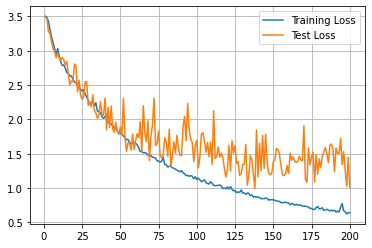

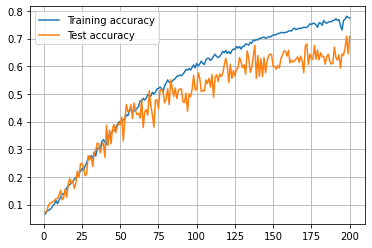

In [172]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_CNN8.history['loss'])+1)


plt.plot(epochs, Hist_CNN8_1.history['loss'])
plt.plot(epochs, Hist_CNN8_1.history['val_loss'])
plt.legend(['Training Loss','Test Loss'])
plt.grid()
plt.show()



plt.plot(epochs, Hist_CNN8_1.history['accuracy'])
plt.plot(epochs, Hist_CNN8_1.history['val_accuracy'])
plt.legend(['Training accuracy','Test accuracy'])
plt.grid()
plt.show()

### 비교

In [131]:
print('1 : ', loss1, accuracy1)
#print('2 : ', loss2, accuracy2)
print('3 : ', loss3, accuracy3)
print('4 : ', loss4, accuracy4)
print('5 : ', loss5, accuracy5)
print('6 : ', loss6, accuracy6)
print('6_1 : ', loss6_1, accuracy6_1)
print('7 : ', loss7, accuracy7)

1 :  1.9615941047668457 0.42596307396888733
3 :  1.8908076286315918 0.42475923895835876
4 :  2.432363748550415 0.2893258333206177
5 :  2.0407402515411377 0.3332664668560028
6 :  3.471947431564331 0.08025681972503662
7 :  3.472013235092163 0.08025681972503662


## 3) XGBoost

In [19]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24916 entries, 0 to 24915
Columns: 2701 entries, 0 to 2700
dtypes: object(2701)
memory usage: 513.4+ MB


In [22]:
X = pd.to_numeric(X)
print(X.head(2))

TypeError: ignored

In [9]:
X = DF.iloc[:,:-1]
y = DF.iloc[:,-1]

X.shape, y.shape

((24916, 2700), (24916,))

In [17]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2045)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state =2045)

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(15945, 2700) (15945,)
(3987, 2700) (3987,)
(4984, 2700) (4984,)


In [18]:
%%time

from xgboost import XGBClassifier

XGB = XGBClassifier(booster='gbtree', n_estimators=500, 
                         learning_rate = 0.05, reg_lambda = 0.05, n_jobs= -1)

XGB.fit(X_train, y_train)

TypeError: ignored

In [ ]:
print(accuracy_score(y_test, XGB.predict(X_test)), '\n')

# IV. 프로젝트 의견 작성

# 
# 
# 
# The End
# 
# 
# 